<a href="https://colab.research.google.com/github/saitzaw/COVID-19/blob/web-data/COVID_19_MYANMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 style="color:green"><strong> မြန်မာပြည်တွင်းရှိ covid-19 ကိုစာရင်းပြုစုထားခြင်း </strong></h3> 
<div>
    <ul> 
        <li> ဇယားနှင့်ပြသခြင်း </li> 
        <li> ဂရပ်ဖ်များနှင့်ပြသခြင်း </li> 
        <li> မြေပုံနှင့်တွဲဖက်ပြသခြင်း </li> 
    </ul> 
    အချက်အလက်များရယူသည့် link: 
    <ul> 
    <li> <a href="https://github.com/theananda/data/blob/master/covid-19/Hospitals.csv">ဆေးရုံဆိုင်ရာအချက်အလက်များရယူရန်</a> </li> 
    <li> <a href="https://github.com/theananda/data/blob/master/covid-19/Medical%20Supplies%20with%20Location.csv">ဆေးရုံဝါးပစ္စည်းများဖြန့်ဝေထားသည့်အချက်အလက်များရယူရန်</a> </li> 
    <li><a href="https://github.com/theananda/data/blob/master/covid-19/MOHS%20Dashboard%20Data.csv">MOHS အချက်အလက်များရယူရန်</a> </li> 
    </ul> 
</div>
<br> 
<div>
    <h5> Data Contributors </h5> 
    <ul>
        <li> ဦးကြည်တိုး </li>
        <li> ဦးဖြိုးကိုကို </li>  
        <li> အနန္တဒေတာ </li> 
    </ul> 
        မှတ်ချက်။    ။ အနန္တဒေတာ သည် မြန်မာပြည်၏ open data ဆိုင်ရာအဖွဲ့အစည်းတစ်ခုဖြစ်သည်။ 
</div> 
<hr>
<footer> 
Alexander Htun မှအချက်အလက်များကို စုစည်းရယူ၍ report ပုံစံလုပ်ဆောင်သည်။ 
</footer> 

In [0]:
#import pandas and folium 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import folium 
import plotly.graph_objects as go 

In [0]:
# get data from anada repo 
mm_hospitals = pd.read_csv('https://raw.githubusercontent.com/theananda/myanmar-covid19-data/master/Hospitals.csv')
medical_supplies_with_location = pd.read_csv('https://raw.githubusercontent.com/theananda/myanmar-covid19-data/master/Medical%20Supplies%20with%20Location.csv')
mohs_info = pd.read_csv('https://raw.githubusercontent.com/theananda/myanmar-covid19-data/master/MOHS%20Dashboard%20Data.csv')

In [0]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(mohs_info.columns[1:15]),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[mohs_info.SR,mohs_info.Township, mohs_info.Hospital,
                       mohs_info.HosPt,mohs_info.PUI,mohs_info.Suspected,mohs_info.M,
                       mohs_info.F,mohs_info.Child,mohs_info.Adult,mohs_info.Lab_Neg,
                       mohs_info.Confirmed,mohs_info.Pending,mohs_info.DC],
               fill_color='lavender',
               align='left'))
])
fig.show()

<h3 style="color:red"> ကူးစက်မှုဖြစ်စဉ်ဒေတာများကိုဂရပ်ဖြင့်ပြသခြင်း </h3> 
<div> 
&nbsp; &nbsp; &nbsp;ယင်းဖြစ်စဉ်တို့ကို မြို့နယ်အလိုက်ခွဲ၍ အောက်ပါအတိုင်းအမျိုးအစားခွဲခြားထားသည်။ 
<ul> 
<li> စောင့်ကြည့်လူနာများ </li> 
<li> ဓာတ်ခွဲခန်းအဖြေကောင်းမှန်သူများ</li> 
<li> ရောဂါပိုးကူးစက်ခံထားရသူများ </li> 
</ul> 
</div> 

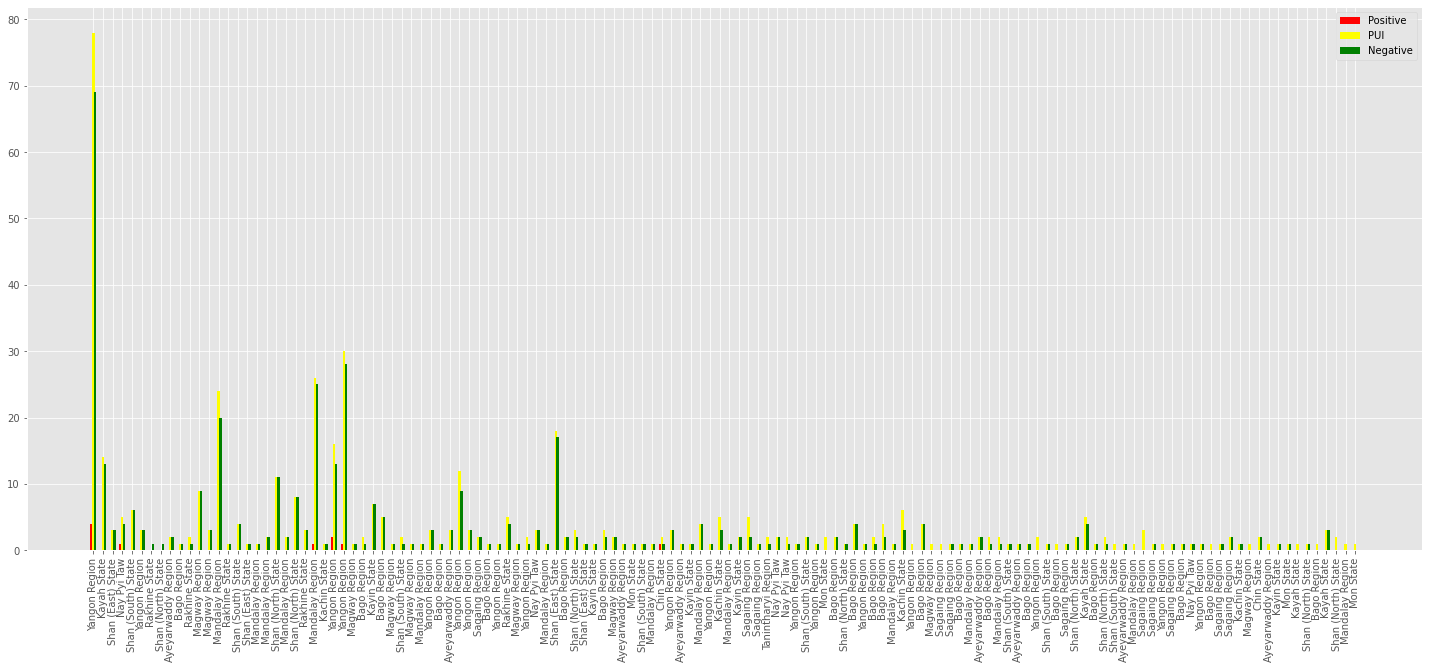

In [0]:
# graph (for three categories PUI, Lab_Neg and Confirmed)
pui_ = mohs_info['PUI']
lab_neg = mohs_info['Lab_Neg']
confirmed = mohs_info['Confirmed']
bar_width = 0.25
colors = {'PUI': 'yellow', 'NEG':'green', 'POS':'red'}
sr = mohs_info['SR']
x = np.arange(len(sr))
plt.figure(figsize=(25,10))
plt.style.use('ggplot')
plt.bar(x-0.2,confirmed, width=bar_width, color=colors['POS'], label="Positive")
plt.bar(x, pui_,width=bar_width, color=colors['PUI'], label="PUI")
plt.bar(x+0.2, lab_neg, width=bar_width, color=colors['NEG'], label="Negative")
plt.legend()
plt.xticks(x,sr, rotation=90);


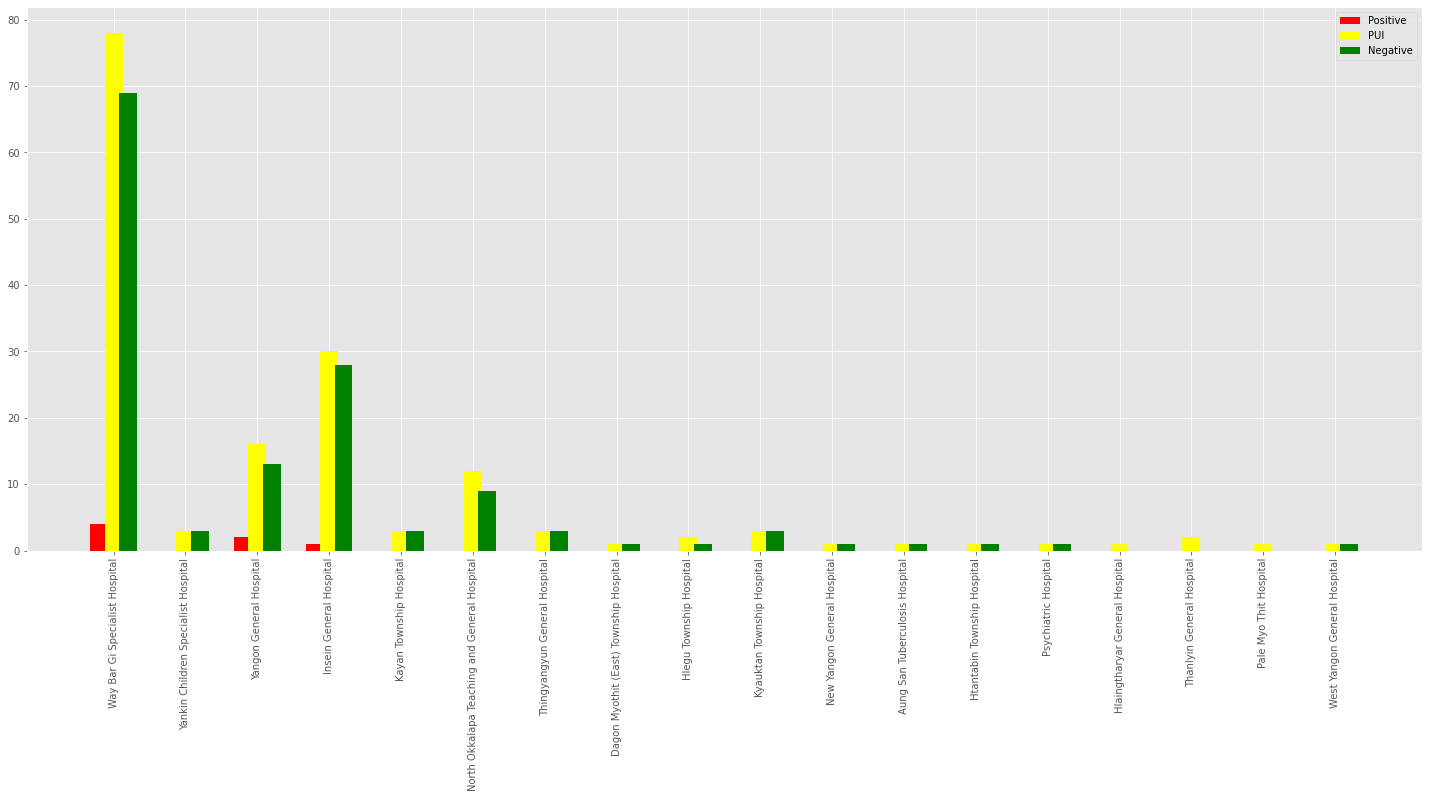

In [0]:
# group the graph 
group_ = mohs_info.groupby('SR')
yng = group_.get_group('Yangon Region')
pui_ = yng['PUI']
lab_neg = yng['Lab_Neg']
confirmed = yng['Confirmed']
bar_width = 0.25
colors = {'PUI': 'yellow', 'NEG':'green', 'POS':'red'}
sr = yng['Hospital']
x = np.arange(len(sr))
plt.figure(figsize=(25,10))
plt.style.use('ggplot')
plt.bar(x-0.2,confirmed, width=bar_width, color=colors['POS'], label="Positive")
plt.bar(x, pui_,width=bar_width, color=colors['PUI'], label="PUI")
plt.bar(x+0.2, lab_neg, width=bar_width, color=colors['NEG'], label="Negative")
plt.legend()
plt.xticks(x,sr, rotation=90);

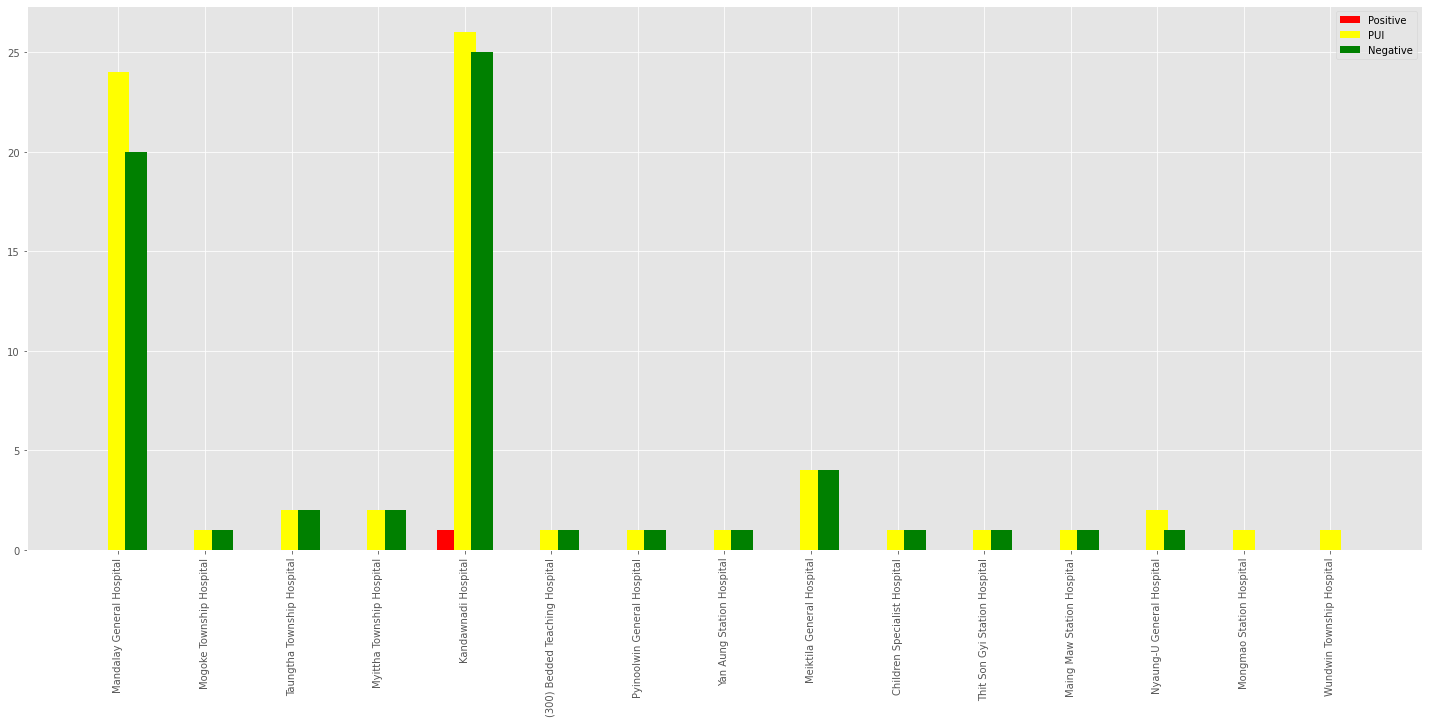

In [0]:
#mandalay 
group_ = mohs_info.groupby('SR')
mdy = group_.get_group('Mandalay Region')
pui_ = mdy['PUI']
lab_neg = mdy['Lab_Neg']
confirmed = mdy['Confirmed']
bar_width = 0.25
colors = {'PUI': 'yellow', 'NEG':'green', 'POS':'red'}
sr = mdy['Hospital']
x = np.arange(len(sr))
plt.figure(figsize=(25,10))
plt.style.use('ggplot')
plt.bar(x-0.2,confirmed, width=bar_width, color=colors['POS'], label="Positive")
plt.bar(x, pui_,width=bar_width, color=colors['PUI'], label="PUI")
plt.bar(x+0.2, lab_neg, width=bar_width, color=colors['NEG'], label="Negative")
plt.legend()
plt.xticks(x,sr, rotation=90);

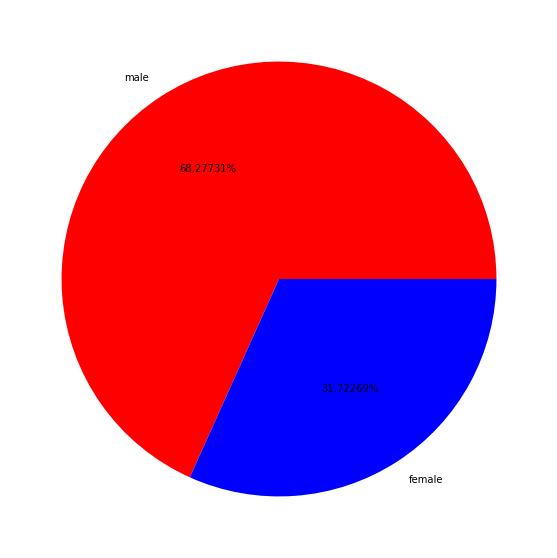

In [0]:
#ယောကျ်ားမိန်းမ အချိုး 
male = np.sum(mohs_info['M'])
female = np.sum(mohs_info['F'])
colour = ['red', 'blue']
plt.figure(figsize=(10,10))
sex = ['male','female']
values =[male, female]
plt.pie(values, labels=sex,autopct='%1.5f%%',colors=colour);

In [0]:
!pip install chart-studio

     |████████████████████████████████| 81kB 2.7MB/s 


In [0]:
mm_map = folium.Map(
    location=[21.9162, 95.9560],
    zoom_start=12,
)
for each in mohs_info.iterrows(): 
    folium.Marker(
        [each[1]['Latitude'],each[1]['Longitude']], 
        icon=folium.Icon(icon='info-sign')).add_to(mm_map)
mm_map

In [0]:
# clean the data 
# လဒ်၊ လောင်မပါသည့်ဆေးရုံများကိုဖယ်ရှားထားသည် 
mm_hospital = mm_hospitals.dropna()

In [0]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(mm_hospitals.columns[0:5]),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[mm_hospitals.region, mm_hospitals.township,mm_hospitals.hospital_name, mm_hospitals.level, mm_hospitals.bed],
               fill_color='lavender',
               align='left'))
])
fig.show()

In [0]:
# မြေပုံတွင်ပြသခြင်း 
# folium popup တွင်မြန်မာစာကိုကောင်းမွန်စွာထောက်ပံ့ပေးနိင်ခြင်းမရှိပါ

mm_map = folium.Map(
    location=[21.9162, 95.9560],
    zoom_start=12,
)
for each in mm_hospital.iterrows(): 
    hospital_info = 'bed: '+str(each[1]['bed'])
    folium.Marker(
        [each[1]['lat'],each[1]['long']], 
        popup = folium.Popup(hospital_info,parse_html=False),
        icon=folium.Icon(color='red', icon='fa-hospital-o',prefix='fa')).add_to(mm_map)
mm_map

In [0]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(medical_supplies_with_location.columns[3:10]),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[medical_supplies_with_location["hospital-name-mm"], medical_supplies_with_location['PPE'],
                       medical_supplies_with_location["Glove"], medical_supplies_with_location["N-95"], 
                       medical_supplies_with_location["Surgical Mask"],medical_supplies_with_location["Goggle"],
                       medical_supplies_with_location["Shoe Cover"]],
               fill_color='lavender',
               align='left'))
])
fig.show()

In [0]:
# remove the place without lat,long 
medical_supplies_location = medical_supplies_with_location.drop([16,20,21,22,23,25])

In [0]:
mm_map = folium.Map(
    location=[21.9162, 95.9560],
    zoom_start=12,
)
for each in medical_supplies_location.iterrows(): 
    info = 'PPE= ' + str(each[1]['PPE']) +' ,Glove= '+str(each[1]['Glove'])+" ,N-95= "+ str(each[1]['N-95']) +" ,Surgical Mask= " + str(each[1]['Surgical Mask']) + " ,Shoe Cover= " + str(each[1]['Shoe Cover'])
    folium.Marker(
        [each[1]['lat'],each[1]['long']], 
        popup = folium.Popup(info, max_width=300) ,
        icon=folium.Icon(color='red', icon='fa-hospital-o',prefix='fa')).add_to(mm_map)
mm_map